In [1]:
# 1) Import
import numpy as np
import tensorflow as tf
from tensorflow import keras

# 2) Carica Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 3) Normalizza [0,255] -> [0,1] e aggiungi il canale
x_train = (x_train.astype("float32") / 255.0)[..., np.newaxis]  # (60000, 28, 28, 1)
x_test  = (x_test.astype("float32")  / 255.0)[..., np.newaxis]  # (10000, 28, 28, 1)

# 4) Crea un piccolo validation set dal train (ad es. 10%)
x_val, y_val = x_train[:6000], y_train[:6000]
x_train, y_train = x_train[6000:], y_train[6000:]

# 5) Controlli veloci
print(x_train.shape, y_train.shape)  # atteso: (~54000, 28, 28, 1)  (~54000,)
print(x_val.shape,   y_val.shape)    # atteso: (6000, 28, 28, 1)    (6000,)
print(x_test.shape,  y_test.shape)   # atteso: (10000, 28, 28, 1)   (10000,)


2025-10-24 08:10:57.127185: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 08:10:57.156349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-24 08:10:59.494860: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


(54000, 28, 28, 1) (54000,)
(6000, 28, 28, 1) (6000,)
(10000, 28, 28, 1) (10000,)


In [2]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/vol/home/s4949404/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761286261.874136  633787 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1188 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
model.compile(
    optimizer="adam",                    # ottimizzatore standard e robusto
    loss="sparse_categorical_crossentropy",  # adatto a etichette intere (0–9)
    metrics=["accuracy"]                 # monitoriamo l’accuratezza
)

history = model.fit(
    x_train, y_train,
    epochs=10,                           # inizia con 10, poi aumentiamo se serve
    batch_size=64,                       # numero di esempi per step di training
    validation_data=(x_val, y_val)
)


Epoch 1/10


2025-10-24 08:11:02.793578: I external/local_xla/xla/service/service.cc:163] XLA service 0x785b5000acb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-24 08:11:02.793591: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2025-10-24 08:11:02.805298: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-24 08:11:02.881364: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400
2025-10-24 08:11:02.898660: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:11:03.172223: I e

 89/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4971 - loss: 1.4938

I0000 00:00:1761286264.938324  635169 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


830/844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7280 - loss: 0.7599

2025-10-24 08:11:06.743116: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:11:07.146849: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_496', 240 bytes spill stores, 240 bytes spill loads



844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8068 - loss: 0.5319 - val_accuracy: 0.8612 - val_loss: 0.3974
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8710 - loss: 0.3543 - val_accuracy: 0.8838 - val_loss: 0.3366
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8877 - loss: 0.3090 - val_accuracy: 0.8872 - val_loss: 0.3080
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8982 - loss: 0.2789 - val_accuracy: 0.9027 - val_loss: 0.2739
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9062 - loss: 0.2547 - val_accuracy: 0.8972 - val_loss: 0.2756
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9125 - loss: 0.2359 - val_accuracy: 0.9068 - val_loss: 0.2570
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9189 - loss: 0.2201 - val_accuracy: 0.9108 - val_loss: 0.2523
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9249 - loss: 0.2007 - val_accuracy: 0.9118 - val_

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Loss sul test set: {test_loss:.4f}")
print(f"Accuratezza sul test set: {test_acc:.4f}")


2025-10-24 08:11:29.505618: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_93', 20 bytes spill stores, 20 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9052 - loss: 0.2744
Loss sul test set: 0.2744
Accuratezza sul test set: 0.9052


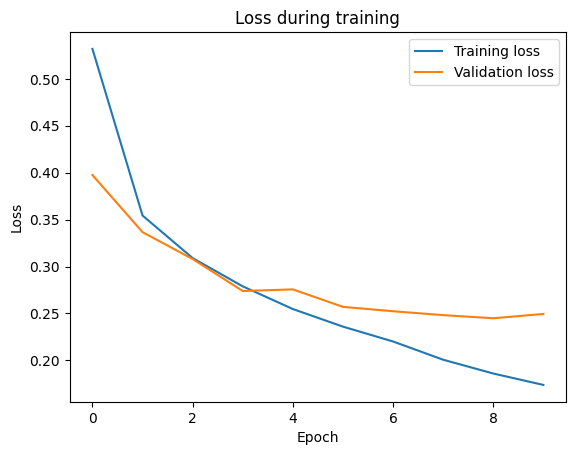

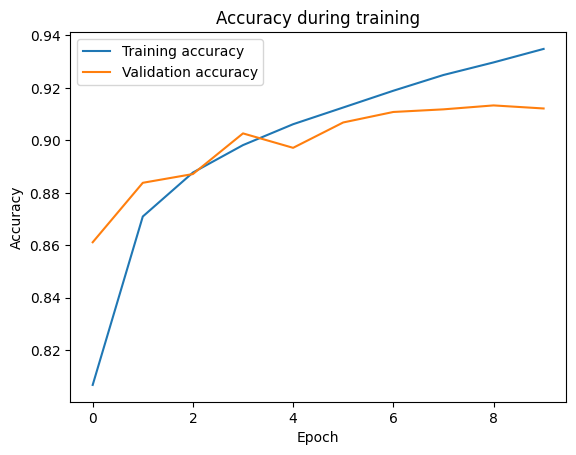

In [5]:
import matplotlib.pyplot as plt

# Grafico della loss
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.title("Loss during training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Grafico dell'accuratezza
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy during training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [24]:
from keras import layers, models, regularizers

model_improved = models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model_improved.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_imp = model_improved.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8231 - loss: 0.5411 - val_accuracy: 0.8757 - val_loss: 0.3649
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8780 - loss: 0.3809 - val_accuracy: 0.8992 - val_loss: 0.3144
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8882 - loss: 0.3544 - val_accuracy: 0.9125 - val_loss: 0.2859
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8972 - loss: 0.3364 - val_accuracy: 0.8900 - val_loss: 0.3562
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9025 - loss: 0.3256 - val_accuracy: 0.8815 - val_loss: 0.4232
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9052 - loss: 0.3216 - val_accuracy: 0.8835 - val_loss: 0.3608
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9085 - loss: 0.3173 - val_accuracy: 0.9200 - val_loss: 0.2789
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9116 - loss: 0.3107 - val_accuracy: 0.

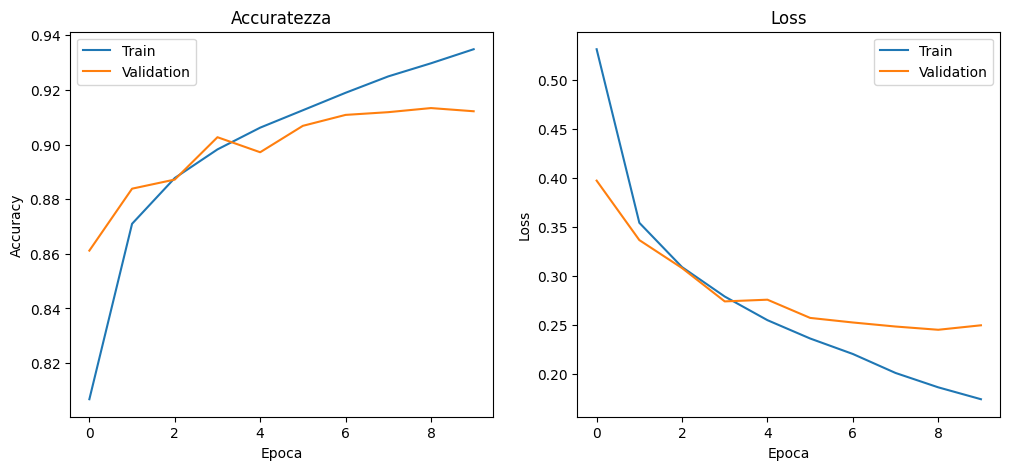

In [7]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuratezza")
plt.xlabel("Epoca")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [8]:
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_adamW = models.Sequential([
    layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])



model_adamW.compile(
    optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Reduce LR when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5
)

history_adamW = model_adamW.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[lr_scheduler]
)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7171 - loss: 0.8705 - val_accuracy: 0.8443 - val_loss: 0.4602 - learning_rate: 1.0000e-04
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8144 - loss: 0.5584 - val_accuracy: 0.8688 - val_loss: 0.3878 - learning_rate: 1.0000e-04
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8384 - loss: 0.4823 - val_accuracy: 0.8822 - val_loss: 0.3473 - learning_rate: 1.0000e-04
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8551 - loss: 0.4335 - val_accuracy: 0.8883 - val_loss: 0.3272 - learning_rate: 1.0000e-04
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8652 - loss: 0.4060 - val_accuracy: 0.8988 - val_loss: 0.3054 - learning_rate: 1.0000e-04
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8748 - loss: 0.3796 - val_accuracy: 0.9067 - val_loss: 0.2846 - learning_rate: 1.0000e-04
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


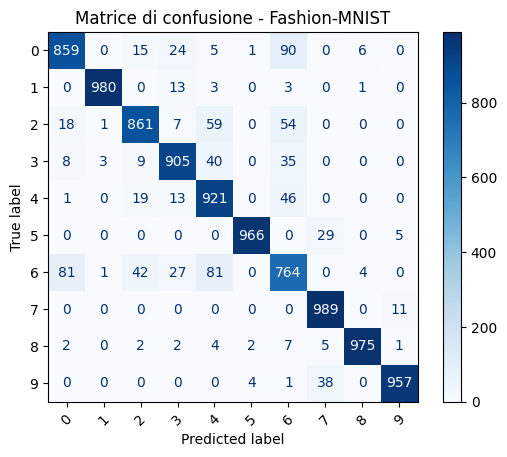

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predizioni finali
y_pred = model_improved.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matrice di confusione - Fashion-MNIST")
plt.show()


In [10]:
def CNN0(channels=32):
    cnn=keras.models.Sequential([
        layers.Conv2D(channels, (3,3),padding="same", activation="relu",input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.25)
    ])
    return cnn

def CNN1(channels=32):
    cnn=keras.models.Sequential([
        layers.Conv2D(channels, (3,3),padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.25)
    ])
    return cnn

def Final_block(units=128):
    final=keras.models.Sequential([
        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])
    return final

model_1=keras.models.Sequential([
    CNN0(),
    CNN1(64),
    Final_block()
])
model_1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_1 = model_1.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/15


/vol/home/s4949404/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8206 - loss: 0.5403 - val_accuracy: 0.8968 - val_loss: 0.3313
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8798 - loss: 0.3796 - val_accuracy: 0.8968 - val_loss: 0.3250
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8912 - loss: 0.3474 - val_accuracy: 0.9077 - val_loss: 0.2986
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8986 - loss: 0.3322 - val_accuracy: 0.9042 - val_loss: 0.3109
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9016 - loss: 0.3273 - val_accuracy: 0.8717 - val_loss: 0.4115
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9053 - loss: 0.3198 - val_accuracy: 0.9210 - val_loss: 0.2835
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9091 - loss: 0.3193 - val_accuracy: 0.9205 - val_loss: 0.2842
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9114 - loss: 0.3156 - val_accuracy: 0.8673 - val_

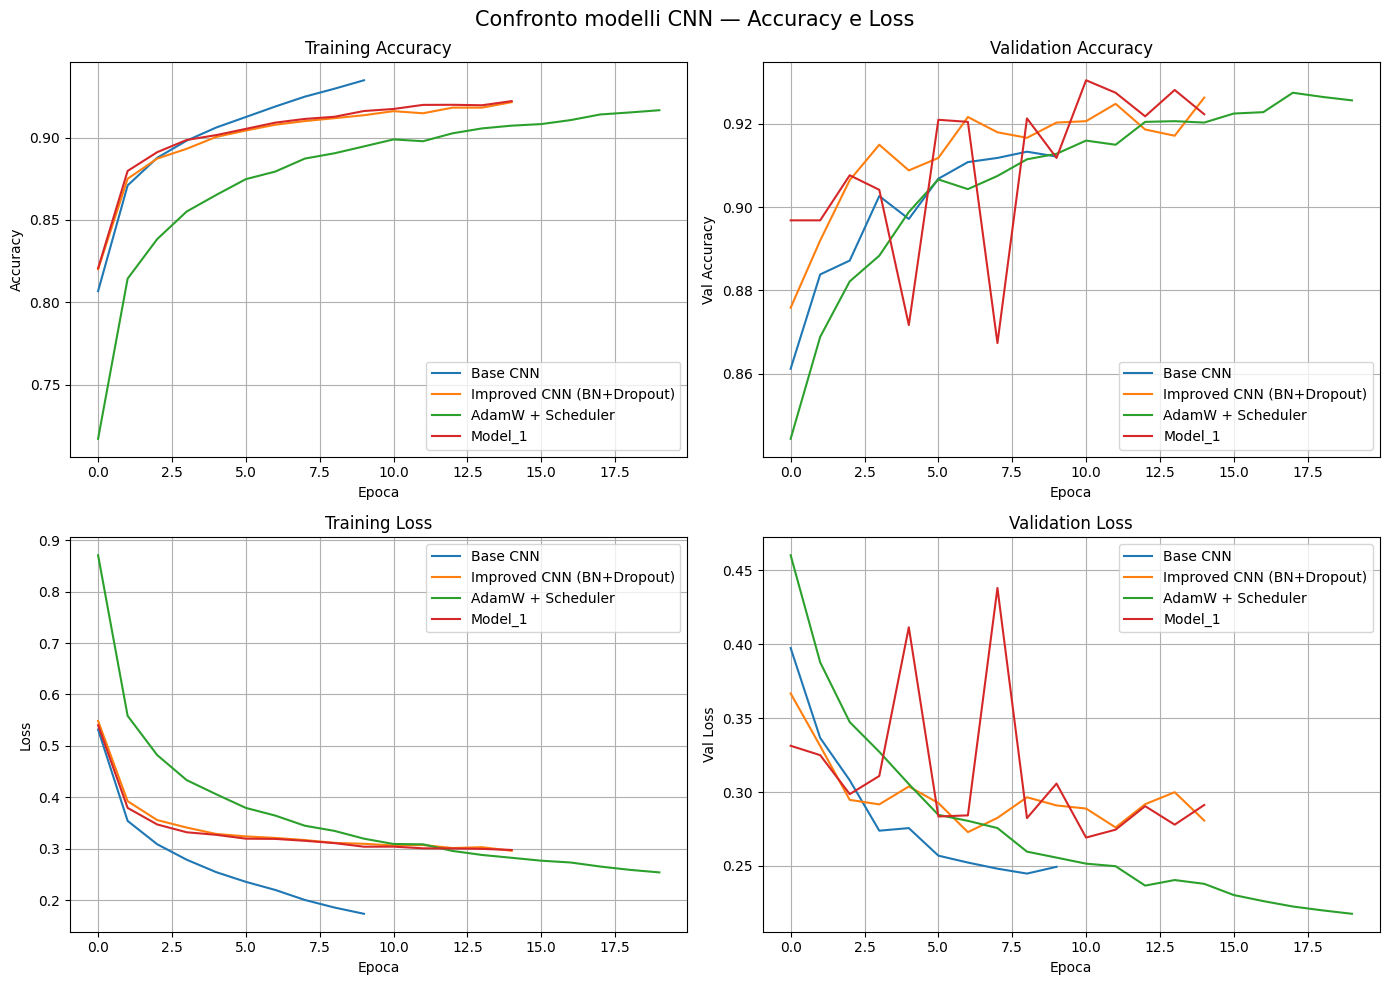

In [11]:
# 🔹 Raccolta di tutte le history finora usate
Histories = {
    "Base CNN": history.history,
    "Improved CNN (BN+Dropout)": history_imp.history,
    "AdamW + Scheduler": history_adamW.history,
    "Model_1": history_1.history
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Training Accuracy
for name, hist in Histories.items():
    axes[0,0].plot(hist["accuracy"], label=name)
axes[0,0].set_title("Training Accuracy")
axes[0,0].set_xlabel("Epoca")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].grid(True)
axes[0,0].legend()

# 2️⃣ Validation Accuracy
for name, hist in Histories.items():
    axes[0,1].plot(hist["val_accuracy"], label=name)
axes[0,1].set_title("Validation Accuracy")
axes[0,1].set_xlabel("Epoca")
axes[0,1].set_ylabel("Val Accuracy")
axes[0,1].grid(True)
axes[0,1].legend()

# 3️⃣ Training Loss
for name, hist in Histories.items():
    axes[1,0].plot(hist["loss"], label=name)
axes[1,0].set_title("Training Loss")
axes[1,0].set_xlabel("Epoca")
axes[1,0].set_ylabel("Loss")
axes[1,0].grid(True)
axes[1,0].legend()

# 4️⃣ Validation Loss
for name, hist in Histories.items():
    axes[1,1].plot(hist["val_loss"], label=name)
axes[1,1].set_title("Validation Loss")
axes[1,1].set_xlabel("Epoca")
axes[1,1].set_ylabel("Val Loss")
axes[1,1].grid(True)
axes[1,1].legend()

plt.suptitle("Confronto modelli CNN — Accuracy e Loss", fontsize=15)
plt.tight_layout()
plt.show()


In [12]:
model_2=keras.models.Sequential([
    CNN0(),
    CNN1(32),
    CNN1(64),
    layers.Conv2D(128, (3,3),padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax")
])

model_2.compile(
    optimizer=AdamW(learning_rate=3e-4, weight_decay=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Reduce LR when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.keras",
    save_best_only=True
)

early_stopping=keras.callbacks.EarlyStopping(
    patience=7,
    restore_best_weights=True
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=40,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[lr_scheduler,checkpoint,early_stopping]
)




Epoch 1/40


2025-10-24 08:13:38.276328: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:13:38.276352: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:13:38.276362: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:13:38.643259: I external/l

835/844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6340 - loss: 1.0487

2025-10-24 08:13:44.172345: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:13:44.172368: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:13:44.172379: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:13:44.730758: I external/l

844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7327 - loss: 0.7483 - val_accuracy: 0.8355 - val_loss: 0.4601 - learning_rate: 3.0000e-04
Epoch 2/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.4766 - val_accuracy: 0.8708 - val_loss: 0.3590 - learning_rate: 3.0000e-04
Epoch 3/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.4050 - val_accuracy: 0.8857 - val_loss: 0.3185 - learning_rate: 3.0000e-04
Epoch 4/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.3662 - val_accuracy: 0.8930 - val_loss: 0.3071 - learning_rate: 3.0000e-04
Epoch 5/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8796 - loss: 0.3414 - val_accuracy: 0.9037 - val_loss: 0.2776 - learning_rate: 3.0000e-04
Epoch 6/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8854 - loss: 0.3243 - val_accuracy: 0.9037 - val_loss: 0.2712 - learning_rate: 3.0000e-04
Epoch 7/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8917 - l

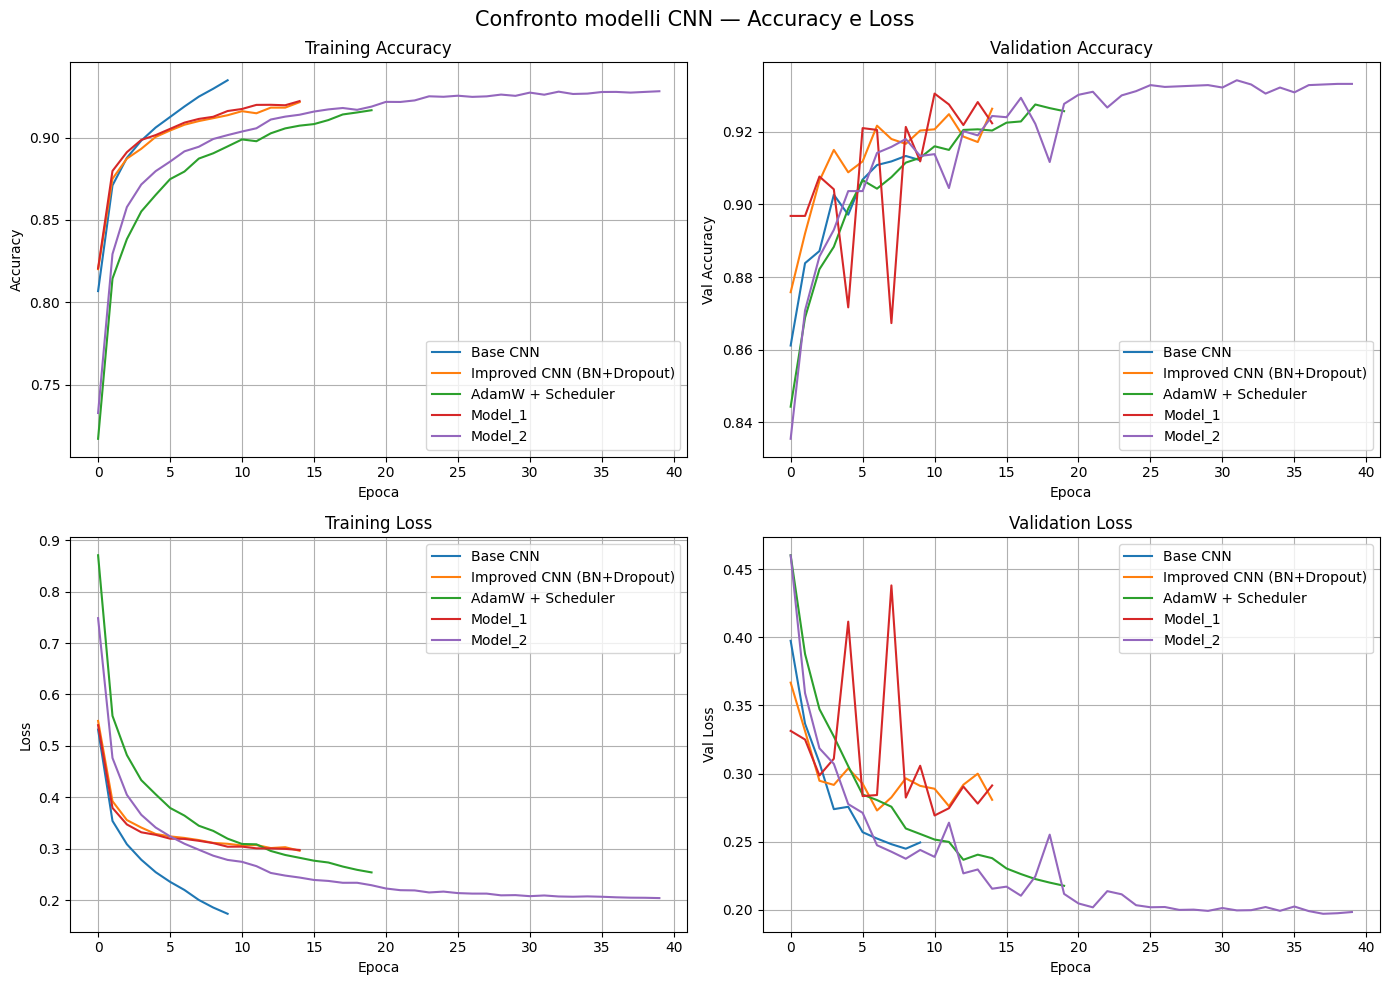

In [13]:
# 🔹 Raccolta di tutte le history finora usate
Histories = {
    "Base CNN": history.history,
    "Improved CNN (BN+Dropout)": history_imp.history,
    "AdamW + Scheduler": history_adamW.history,
    "Model_1": history_1.history,
    "Model_2": history_2.history
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Training Accuracy
for name, hist in Histories.items():
    axes[0,0].plot(hist["accuracy"], label=name)
axes[0,0].set_title("Training Accuracy")
axes[0,0].set_xlabel("Epoca")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].grid(True)
axes[0,0].legend()

# 2️⃣ Validation Accuracy
for name, hist in Histories.items():
    axes[0,1].plot(hist["val_accuracy"], label=name)
axes[0,1].set_title("Validation Accuracy")
axes[0,1].set_xlabel("Epoca")
axes[0,1].set_ylabel("Val Accuracy")
axes[0,1].grid(True)
axes[0,1].legend()

# 3️⃣ Training Loss
for name, hist in Histories.items():
    axes[1,0].plot(hist["loss"], label=name)
axes[1,0].set_title("Training Loss")
axes[1,0].set_xlabel("Epoca")
axes[1,0].set_ylabel("Loss")
axes[1,0].grid(True)
axes[1,0].legend()

# 4️⃣ Validation Loss
for name, hist in Histories.items():
    axes[1,1].plot(hist["val_loss"], label=name)
axes[1,1].set_title("Validation Loss")
axes[1,1].set_xlabel("Epoca")
axes[1,1].set_ylabel("Val Loss")
axes[1,1].grid(True)
axes[1,1].legend()

plt.suptitle("Confronto modelli CNN — Accuracy e Loss", fontsize=15)
plt.tight_layout()
plt.show()

In [14]:
model_3=keras.models.Sequential([
    layers.Conv2D(32, (5,5),padding="same",input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),


    layers.Conv2D(64, (5,5),padding="same"),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(128, (5,5),padding="same"),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    
    layers.Conv2D(256, (5,5),padding="same"),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax")
])

model_3.compile(
    optimizer=AdamW(learning_rate=3e-4, weight_decay=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Reduce LR when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.keras",
    save_best_only=True
)

early_stopping=keras.callbacks.EarlyStopping(
    patience=7,
    restore_best_weights=True
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=40,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[lr_scheduler,checkpoint,early_stopping]
)



Epoch 1/40


2025-10-24 08:14:42.452657: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:14:42.452679: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:14:42.834338: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3490', 104 bytes spill stores, 104 bytes spill loads



827/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.8153

2025-10-24 08:14:47.991312: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:14:47.991335: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:14:48.309703: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3490', 424 bytes spill stores, 440 bytes spill loads



844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7940 - loss: 0.5822 - val_accuracy: 0.8538 - val_loss: 0.4063 - learning_rate: 3.0000e-04
Epoch 2/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8656 - loss: 0.3841 - val_accuracy: 0.8552 - val_loss: 0.4123 - learning_rate: 3.0000e-04
Epoch 3/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8819 - loss: 0.3389 - val_accuracy: 0.9015 - val_loss: 0.2778 - learning_rate: 3.0000e-04
Epoch 4/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8908 - loss: 0.3155 - val_accuracy: 0.9013 - val_loss: 0.2770 - learning_rate: 3.0000e-04
Epoch 5/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8984 - loss: 0.2947 - val_accuracy: 0.9088 - val_loss: 0.2574 - learning_rate: 3.0000e-04
Epoch 6/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9027 - loss: 0.2818 - val_accuracy: 0.9142 - val_loss: 0.2486 - learning_rate: 3.0000e-04
Epoch 7/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9059 - l

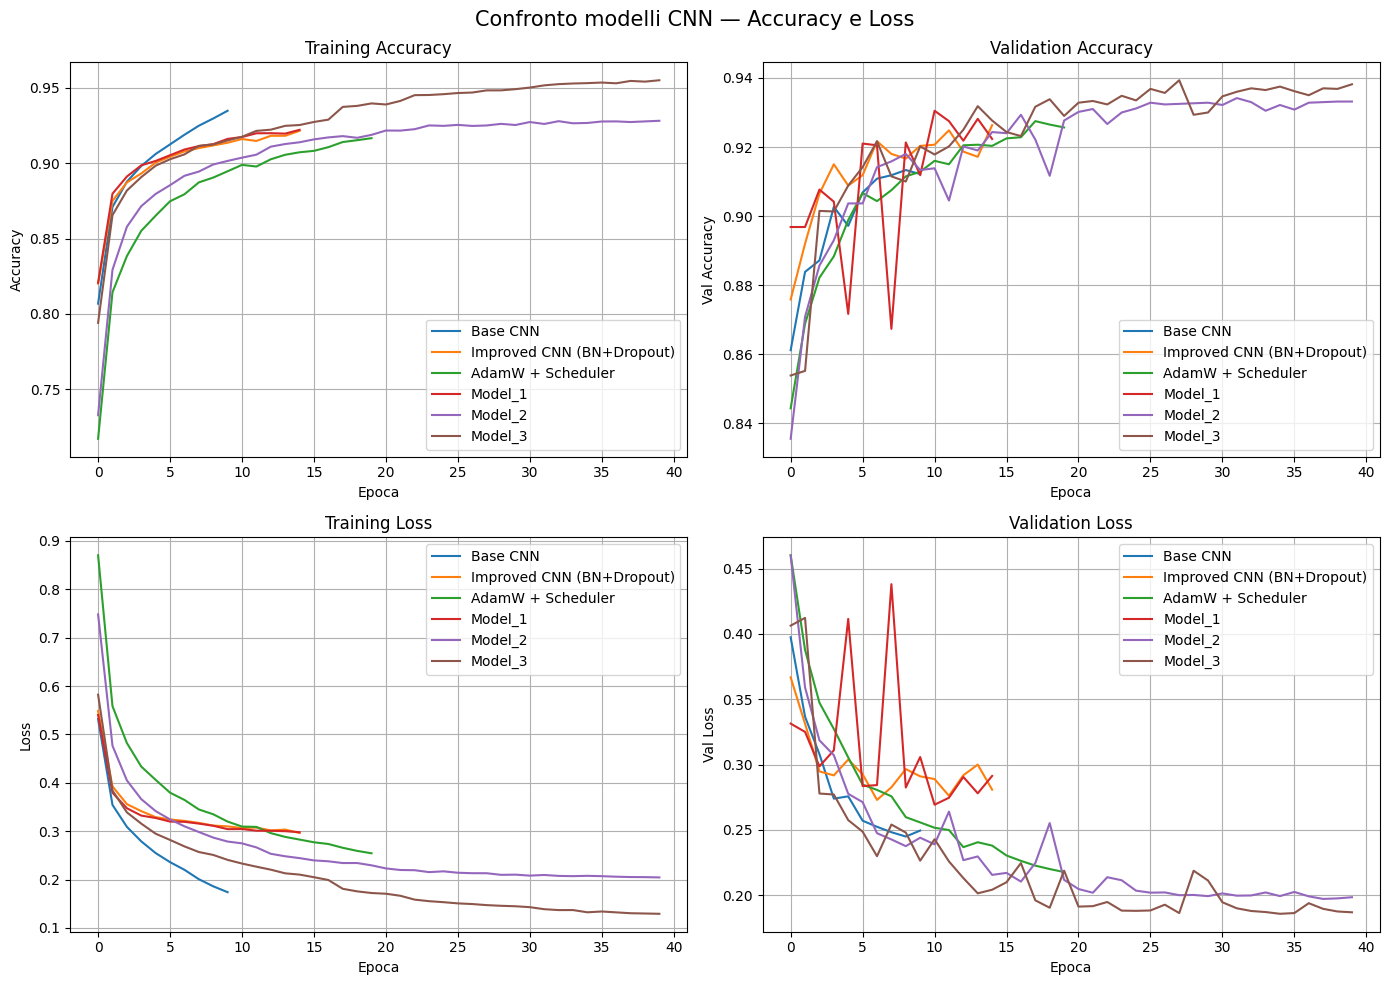

In [15]:
# 🔹 Raccolta di tutte le history finora usate
Histories = {
    "Base CNN": history.history,
    "Improved CNN (BN+Dropout)": history_imp.history,
    "AdamW + Scheduler": history_adamW.history,
    "Model_1": history_1.history,
    "Model_2": history_2.history,
    "Model_3": history_3.history
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Training Accuracy
for name, hist in Histories.items():
    axes[0,0].plot(hist["accuracy"], label=name)
axes[0,0].set_title("Training Accuracy")
axes[0,0].set_xlabel("Epoca")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].grid(True)
axes[0,0].legend()

# 2️⃣ Validation Accuracy
for name, hist in Histories.items():
    axes[0,1].plot(hist["val_accuracy"], label=name)
axes[0,1].set_title("Validation Accuracy")
axes[0,1].set_xlabel("Epoca")
axes[0,1].set_ylabel("Val Accuracy")
axes[0,1].grid(True)
axes[0,1].legend()

# 3️⃣ Training Loss
for name, hist in Histories.items():
    axes[1,0].plot(hist["loss"], label=name)
axes[1,0].set_title("Training Loss")
axes[1,0].set_xlabel("Epoca")
axes[1,0].set_ylabel("Loss")
axes[1,0].grid(True)
axes[1,0].legend()

# 4️⃣ Validation Loss
for name, hist in Histories.items():
    axes[1,1].plot(hist["val_loss"], label=name)
axes[1,1].set_title("Validation Loss")
axes[1,1].set_xlabel("Epoca")
axes[1,1].set_ylabel("Val Loss")
axes[1,1].grid(True)
axes[1,1].legend()

plt.suptitle("Confronto modelli CNN — Accuracy e Loss", fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
model_4=keras.models.Sequential([
    layers.Conv2D(32, (3,3),padding="same",input_shape=(28,28,1),kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),


    layers.Conv2D(64, (3,3),padding="same",kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3),padding="same",kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    
    layers.Conv2D(256, (3,3),padding="same",kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax")
])

model_4.compile(
    optimizer=AdamW(learning_rate=3e-4, weight_decay=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Reduce LR when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.keras",
    save_best_only=True
)

early_stopping=keras.callbacks.EarlyStopping(
    patience=7,
    restore_best_weights=True
)

history_4 = model_4.fit(
    x_train, y_train,
    epochs=40,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[lr_scheduler,checkpoint,early_stopping]
)


Epoch 1/40


/vol/home/s4949404/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-10-24 08:16:29.596990: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:16:29.597013: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:16:29.983469: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local m

831/844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6290 - loss: 1.0584

2025-10-24 08:16:34.005913: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:16:34.005934: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:16:34.427451: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3518', 520 bytes spill stores, 520 bytes spill loads



844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7304 - loss: 0.7614 - val_accuracy: 0.8060 - val_loss: 0.5362 - learning_rate: 3.0000e-04
Epoch 2/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8231 - loss: 0.5003 - val_accuracy: 0.8612 - val_loss: 0.3886 - learning_rate: 3.0000e-04
Epoch 3/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8479 - loss: 0.4349 - val_accuracy: 0.8738 - val_loss: 0.3583 - learning_rate: 3.0000e-04
Epoch 4/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8604 - loss: 0.3971 - val_accuracy: 0.8932 - val_loss: 0.3172 - learning_rate: 3.0000e-04
Epoch 5/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8699 - loss: 0.3759 - val_accuracy: 0.8953 - val_loss: 0.3030 - learning_rate: 3.0000e-04
Epoch 6/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8749 - loss: 0.3549 - val_accuracy: 0.8877 - val_loss: 0.3151 - learning_rate: 3.0000e-04
Epoch 7/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8831 - lo

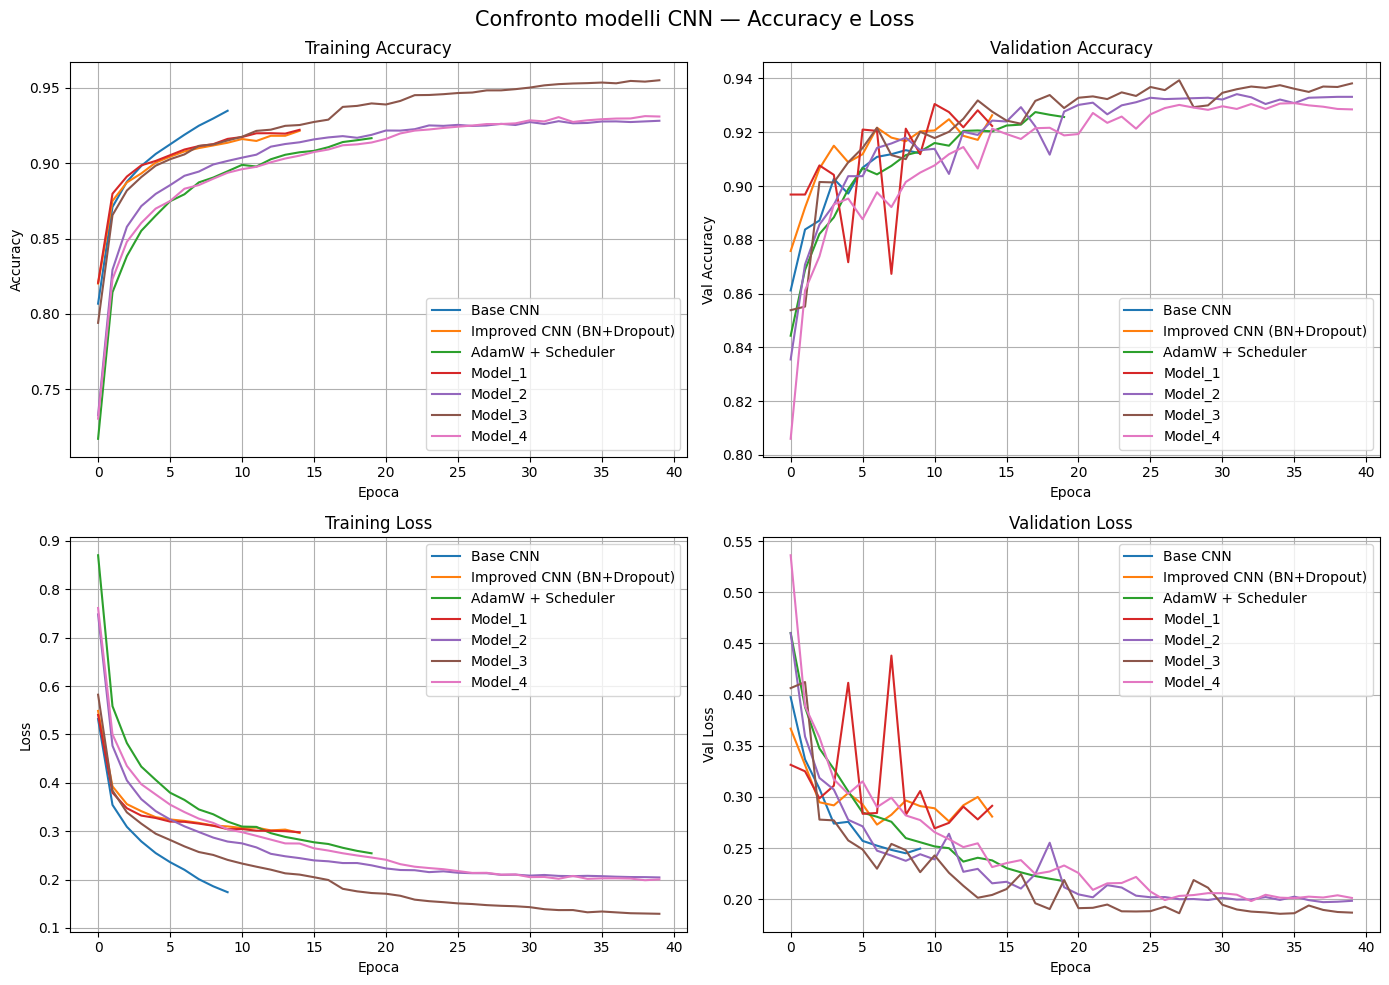

In [17]:
# 🔹 Raccolta di tutte le history finora usate
Histories = {
    "Base CNN": history.history,
    "Improved CNN (BN+Dropout)": history_imp.history,
    "AdamW + Scheduler": history_adamW.history,
    "Model_1": history_1.history,
    "Model_2": history_2.history,
    "Model_3": history_3.history,
    "Model_4": history_4.history
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Training Accuracy
for name, hist in Histories.items():
    axes[0,0].plot(hist["accuracy"], label=name)
axes[0,0].set_title("Training Accuracy")
axes[0,0].set_xlabel("Epoca")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].grid(True)
axes[0,0].legend()

# 2️⃣ Validation Accuracy
for name, hist in Histories.items():
    axes[0,1].plot(hist["val_accuracy"], label=name)
axes[0,1].set_title("Validation Accuracy")
axes[0,1].set_xlabel("Epoca")
axes[0,1].set_ylabel("Val Accuracy")
axes[0,1].grid(True)
axes[0,1].legend()

# 3️⃣ Training Loss
for name, hist in Histories.items():
    axes[1,0].plot(hist["loss"], label=name)
axes[1,0].set_title("Training Loss")
axes[1,0].set_xlabel("Epoca")
axes[1,0].set_ylabel("Loss")
axes[1,0].grid(True)
axes[1,0].legend()

# 4️⃣ Validation Loss
for name, hist in Histories.items():
    axes[1,1].plot(hist["val_loss"], label=name)
axes[1,1].set_title("Validation Loss")
axes[1,1].set_xlabel("Epoca")
axes[1,1].set_ylabel("Val Loss")
axes[1,1].grid(True)
axes[1,1].legend()

plt.suptitle("Confronto modelli CNN — Accuracy e Loss", fontsize=15)
plt.tight_layout()
plt.show()

In [19]:
# Carichiamo il modello salvato con i pesi migliori
best = keras.models.load_model("best_model.keras")

# Valutiamo sul test set
test_loss, test_acc = best.evaluate(x_test, y_test)
print(f"Loss sul test set: {test_loss:.4f}")
print(f"Accuratezza sul test set: {test_acc:.4f}")

2025-10-24 08:19:15.746506: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-24 08:19:15.881382: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_199', 4 bytes spill stores, 4 bytes spill loads

2025-10-24 08:19:15.899124: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_199', 8 bytes spill stores, 8 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9249 - loss: 0.2189
Loss sul test set: 0.2189
Accuratezza sul test set: 0.9249
